<a href="https://colab.research.google.com/github/rtishhhaa56565/electric_cars_demand_forecast/blob/main/rgz_analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

def load_data(file_path):
    return pd.read_csv(file_path, sep=';', encoding='latin1')  # или попробуй cp1252

In [11]:
df = load_data('IEA-EV-dataEV salesHistoricalCars.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039000000106170774
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.006500000134110451
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220


In [2]:
import pandas as pd

def load_data(file_path):
    return pd.read_csv(file_path, sep=';')  # Указан разделитель, если используется ; в CSV

In [3]:
def clean_data(df):
    df = df.dropna()           # Удаление строк с пропущенными значениями
    df = df.drop_duplicates()  # Удаление дубликатов
    return df

In [4]:
import matplotlib.pyplot as plt

def analyze_sales(df, region):
    region_data = df[df['region'] == region]
    plt.plot(region_data['year'], region_data['value'], marker='o')
    plt.title(f'Продажи электромобилей в регионе: {region}')
    plt.xlabel('Год')
    plt.ylabel('Количество продаж')
    plt.grid(True)
    plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

def predict_sales(df, region):
    region_data = df[df['region'] == region]
    X = region_data['year'].values.reshape(-1, 1)
    y = region_data['value'].values
    model = LinearRegression()
    model.fit(X, y)
    return model.predict([[2024]])[0]

In [6]:
def generate_report(df, region):
    prediction = predict_sales(df, region)
    print(f"Прогноз спроса на электромобили в регионе {region} на 2024 год: {prediction:.2f} единиц")

Пример тестирования

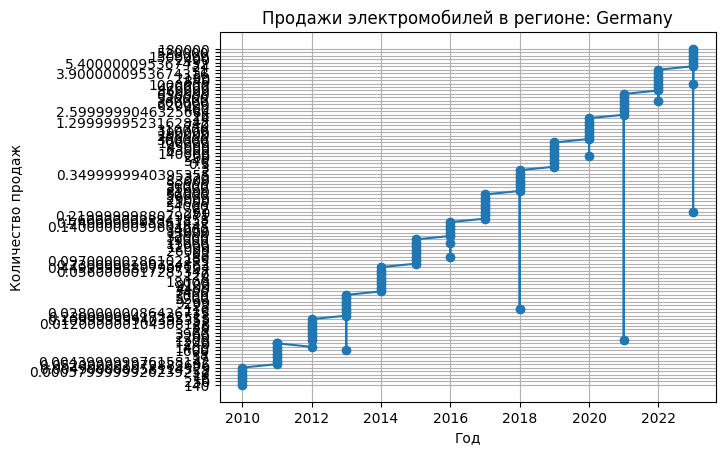

Прогноз спроса на электромобили в регионе Germany на 2024 год: 292425.05 единиц


In [12]:
# 1. Загрузка данных
df = load_data('IEA-EV-dataEV salesHistoricalCars.csv')

# 2. Очистка данных
df = clean_data(df)

# 3. Визуализация по региону
analyze_sales(df, 'Germany')

# 4. Генерация прогноза
generate_report(df, 'Germany')